In [10]:
import torch
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image 
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from diffusers import UniPCMultistepScheduler

import os
import cv2
from PIL import Image 
import numpy as np

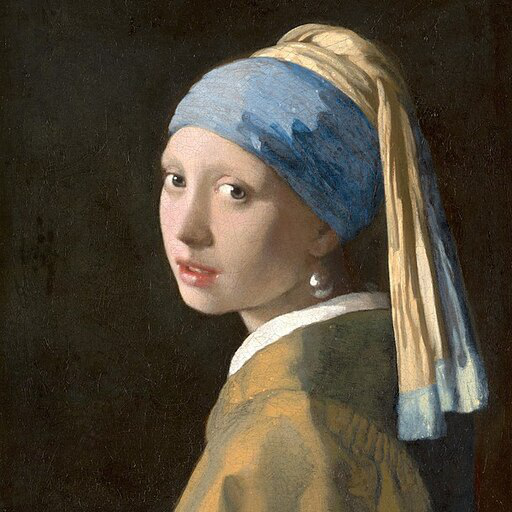

In [3]:
# 이미지 불러오기
image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)

image

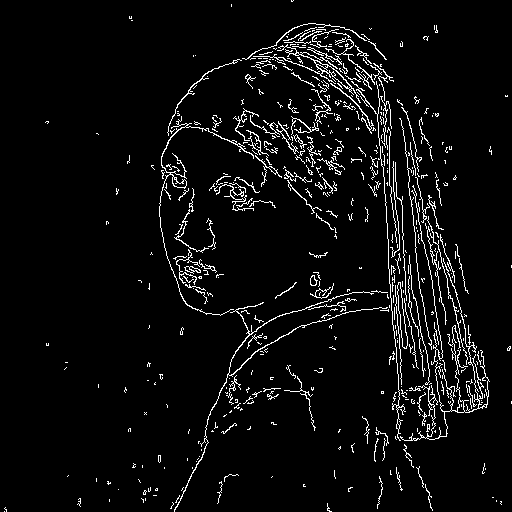

In [4]:
# 이미지를 NumPy 배열로 변환합니다. 
image = np.array(image)

# threshold를 지정합니다. 
low_threshold = 100
high_threshold = 200

# 윤곽선을 검출합니다. 
image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)  # NumPy 배열을 PIL 이미지로 변환합니다. 

canny_image

In [2]:
canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
canny_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=canny_controlnet, torch_dtype=torch.float16
)

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [3]:
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

In [ ]:
# 동일한 이미지를 생성하기 위해 seed를 지정합니다. 
generator = torch.manual_seed(0)  

# 이미지를 생성합니다. 
canny_image = canny_pipe(
    prompt="disco dancer with colorful lights", 
    num_inference_steps=20, 
    generator=generator, 
    image=canny_image
).images[0]

# 생성된 이미지를 저장합니다. 
canny_image.save("/aiffel/aiffel/canny_image.png")  

# 생성된 이미지를 출력합니다. 
canny_image

In [5]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path = os.getenv('HOME')+'/aiffel/portrait.jpg'  
image1 = cv2.imread(img_path) 

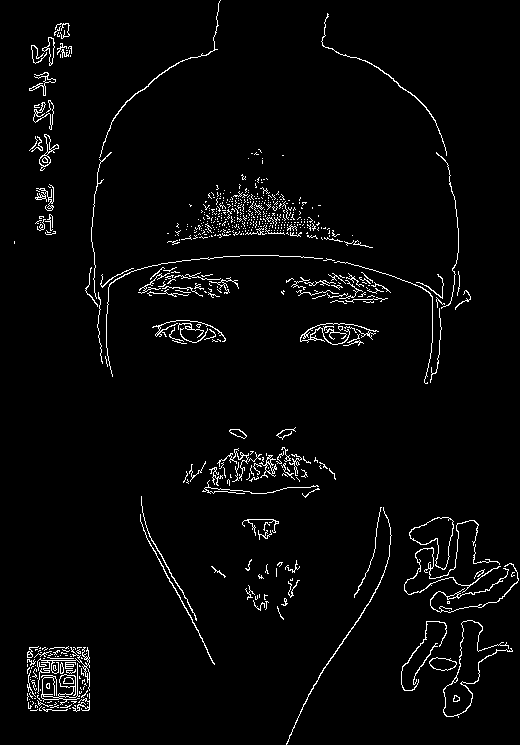

In [6]:

# threshold를 지정합니다. 
low_threshold = 150
high_threshold = 300

# 윤곽선을 검출합니다. 
image1 = cv2.Canny(image1, low_threshold, high_threshold)
image1 = image1[:, :, None]
image1 = np.concatenate([image1, image1, image1], axis=2)
canny_image1 = Image.fromarray(image1)  # NumPy 배열을 PIL 이미지로 변환합니다. 

canny_image1

In [11]:
torch.cuda.empty_cache()

  0%|          | 0/35 [00:00<?, ?it/s]

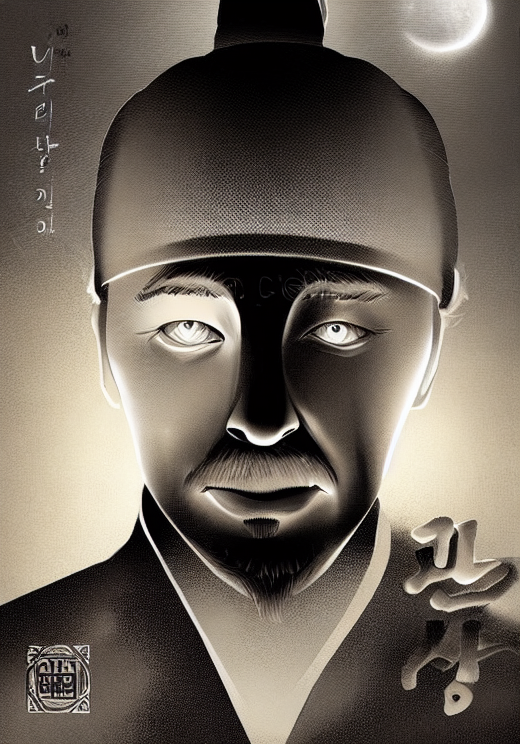

In [12]:
# 동일한 이미지를 생성하기 위해 seed를 지정합니다. 
generator = torch.manual_seed(0)  

# 이미지를 생성합니다. 
canny_image1 = canny_pipe(
    prompt="A gentleman in a suit stands beneath the enchanting embrace of moonlight, captured in a timeless digital illustration", 
    negative_propmt="busy, chaotic, noisy",
    num_inference_steps=35, 
    generator=generator, 
    image=canny_image1
).images[0]

# 생성된 이미지를 저장합니다. 
canny_image1.save("/aiffel/canny_image1.png")  

# 생성된 이미지를 출력합니다. 
canny_image1

In [15]:
from diffusers.utils import load_image
from controlnet_aux import OpenposeDetector
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel 
from diffusers import UniPCMultistepScheduler

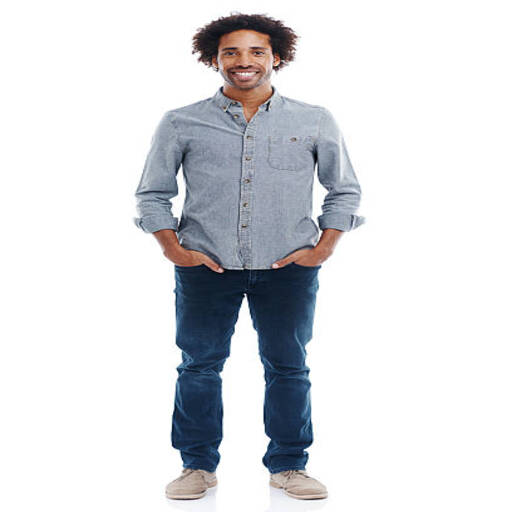

In [2]:
openpose_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png"
)
openpose_image


body_pose_model.pth:   0%|          | 0.00/209M [00:00<?, ?B/s]

cuda


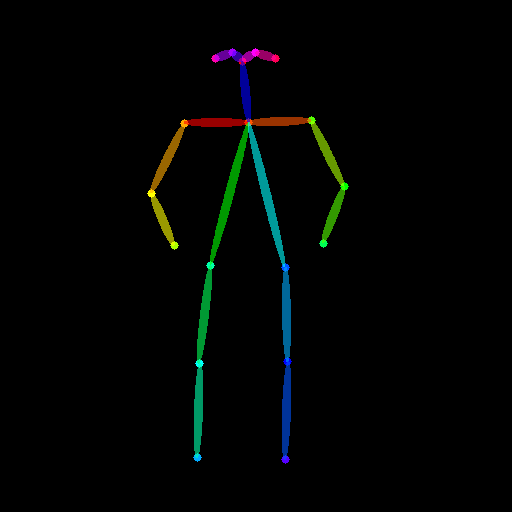

In [4]:
# 인체의 자세를 검출하는 사전 학습된 ControlNet 불러오기
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

# 이미지에서 자세 검출
openpose_image = openpose(openpose_image)
openpose_image

In [8]:
openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
openpose_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=openpose_controlnet, torch_dtype=torch.float16
)

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [24]:
openpose_image = np.array(openpose_image)
openpose_image = Image.fromarray(openpose_image)

  0%|          | 0/20 [00:00<?, ?it/s]

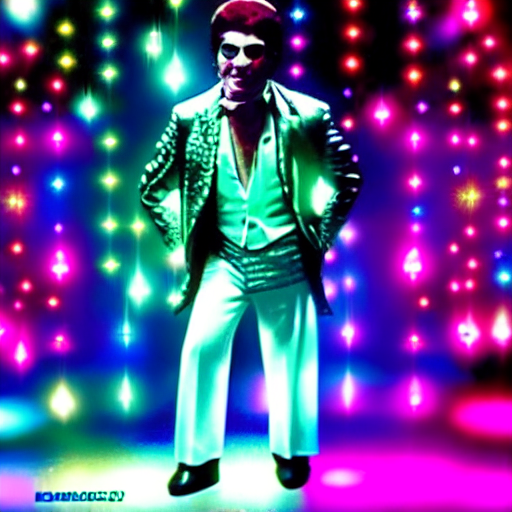

In [33]:
openpose_pipe.scheduler = UniPCMultistepScheduler.from_config(openpose_pipe.scheduler.config)
openpose_pipe = openpose_pipe.to("cuda")

# Q. 코드를 작성해 보세요.
# 동일한 이미지를 생성하기 위해 seed를 넣어줍니다. 
generator = torch.manual_seed(0)

#프롬프트를 작성합니다. 
prompt =  "disco dancer with colorful lights"
negative_prompt =  "Low-quality, black and white"

images = openpose_image

# 이미지를 생성합니다. 
openpose_image1 = openpose_pipe(
    prompt,
    num_inference_steps = 20,
    generator = generator,
    image = openpose_image).images[0]

# 생성된 이미지를 출력합니다. 
openpose_image1

In [36]:
torch.cuda.empty_cache()

In [35]:
# 생성된 이미지를 저장합니다. 
openpose_image1.save("/aiffel/openpose_image1.png")  

In [1]:
from diffusers.utils import load_image 
from PIL import Image
import cv2
import numpy as np
import os
from diffusers.utils import load_image

In [2]:
image = load_image(os.getenv('HOME')+'/aiffel/20231116.jpg')

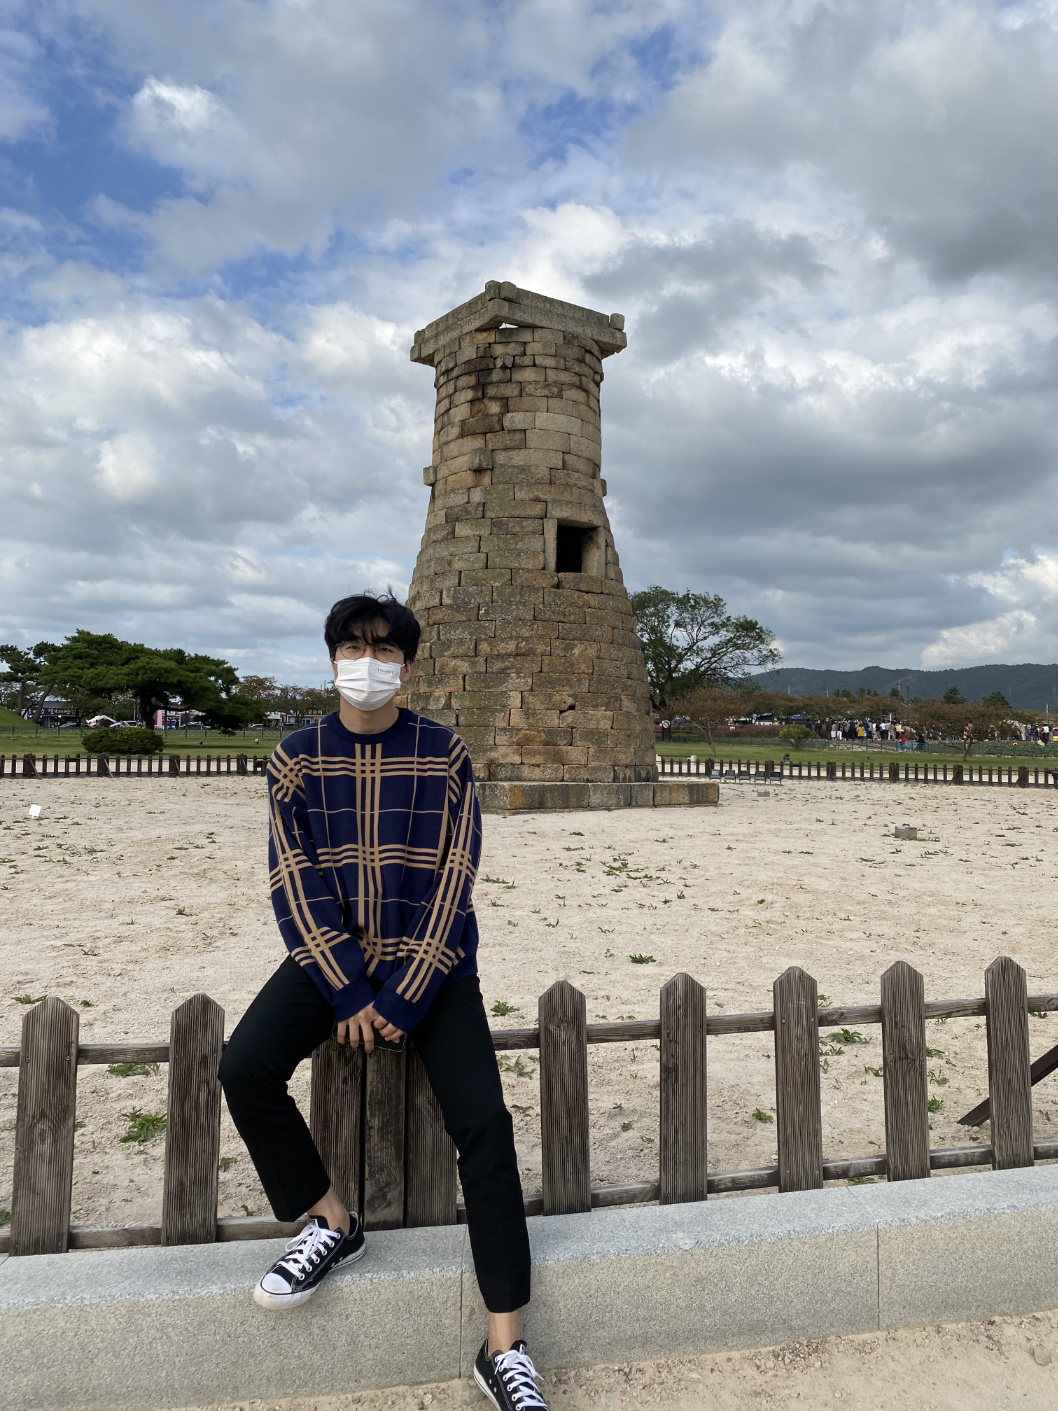

In [3]:
image

In [4]:
#threshhold를 지정합니다. 
low_threshold = 150
high_threshold = 200

In [5]:
# 이미지를 NumPy 배열로 변환합니다. 
image = np.array(image)

In [6]:
# 인체 감지 포즈를 넣어줄 가운데 부분을 지워줍니다. // 5 하니까 다리가 쏙 사라짐
zero_start = image.shape[1] // 5
zero_end = zero_start + image.shape[1] // 2
image[:, zero_start:zero_end] = 0

In [7]:
ck_image = Image.fromarray(image)

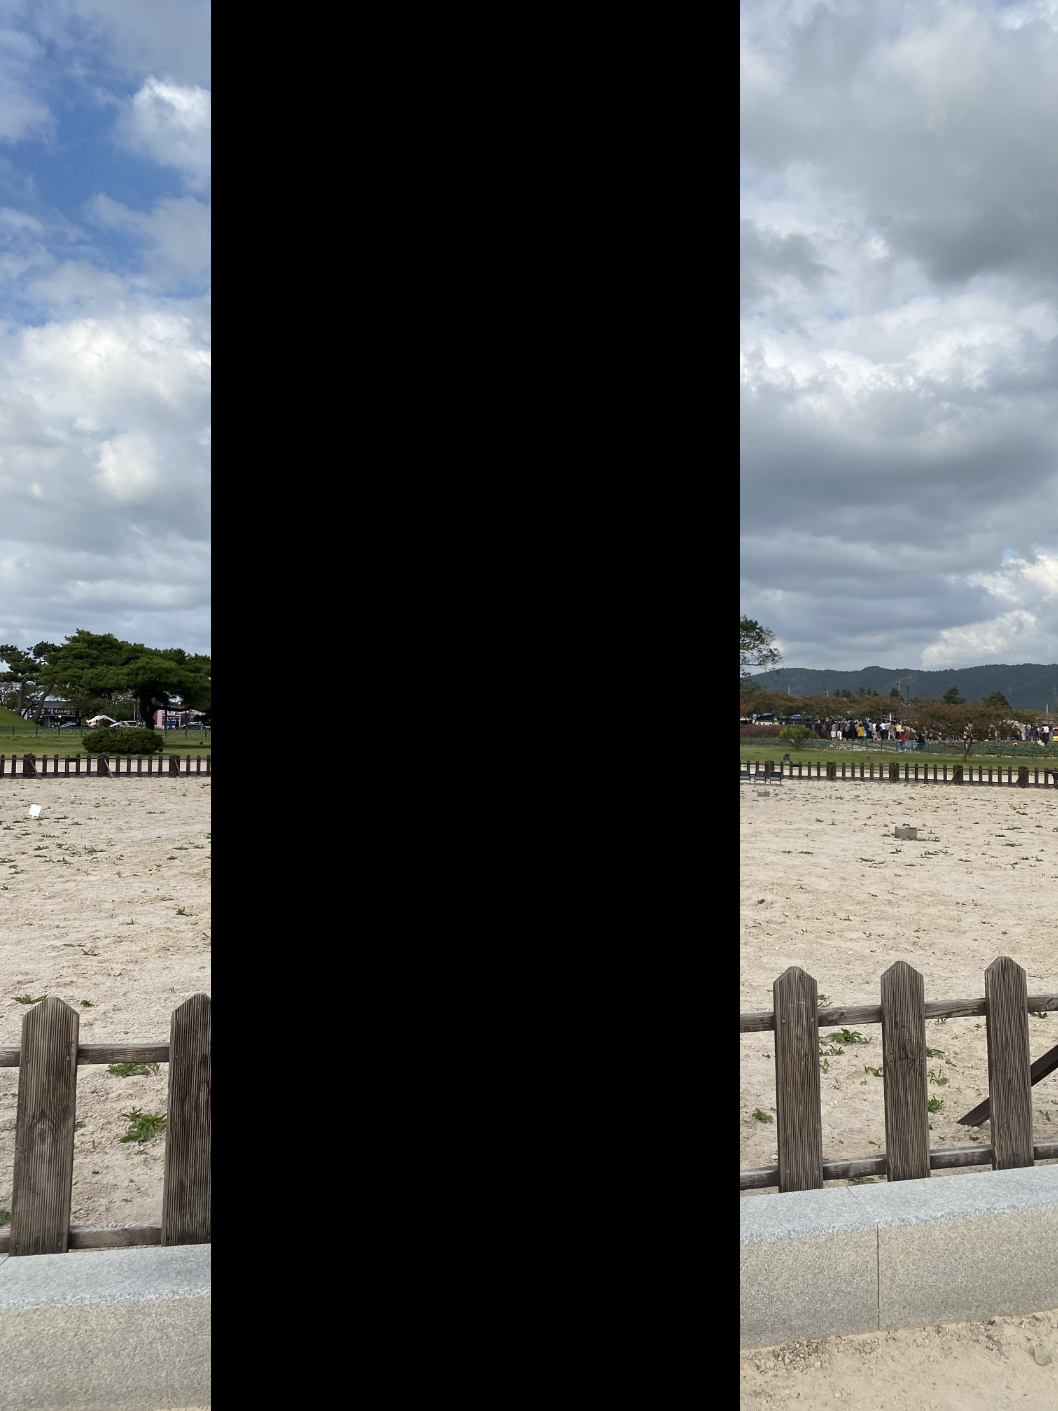

In [8]:
ck_image

In [9]:
# 윤곽선을 검출합니다. 
lined_image = cv2.Canny(image, low_threshold, high_threshold)
lined_image = lined_image[:, :, None]
lined_image = np.concatenate([lined_image, lined_image, lined_image], axis=2)
canny_image = Image.fromarray(lined_image)  # NumPy 배열을 PIL 이미지로 변환합니다. 

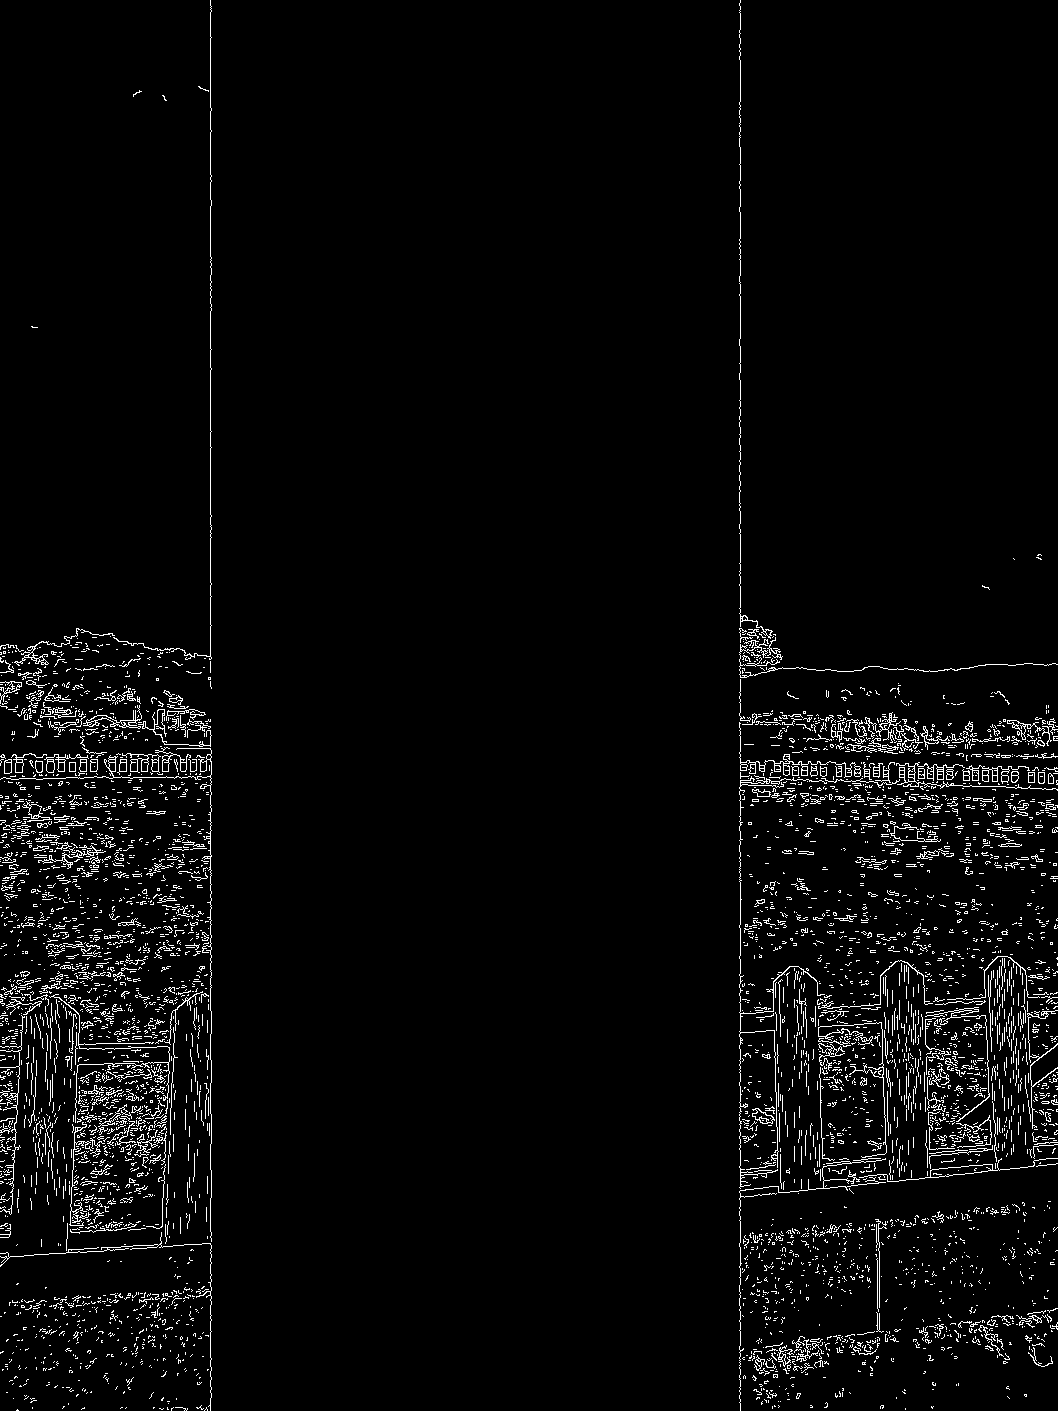

In [10]:
canny_image

In [11]:
openpose_image = load_image(os.getenv('HOME')+'/aiffel/20231206.jpg')

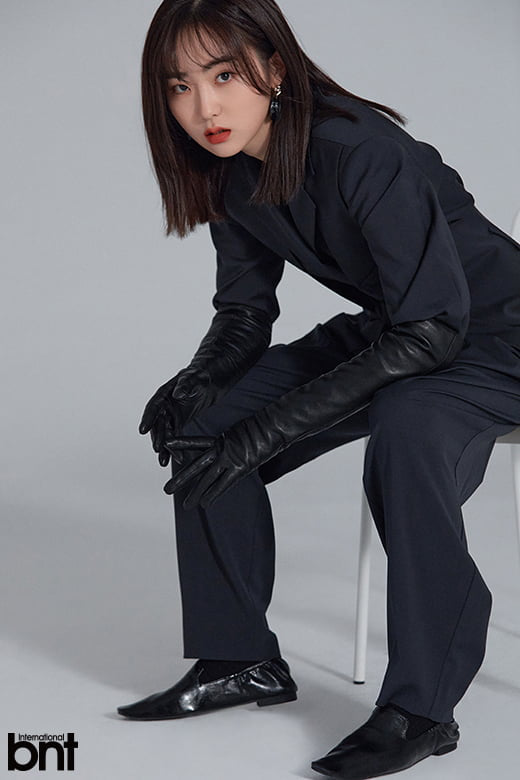

In [12]:
openpose_image

In [13]:
from controlnet_aux import OpenposeDetector

In [14]:
# OpenposeDetector를 사용하여 인체 자세를 검출합니다. 
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
backbone_image = openpose(openpose_image)

cuda


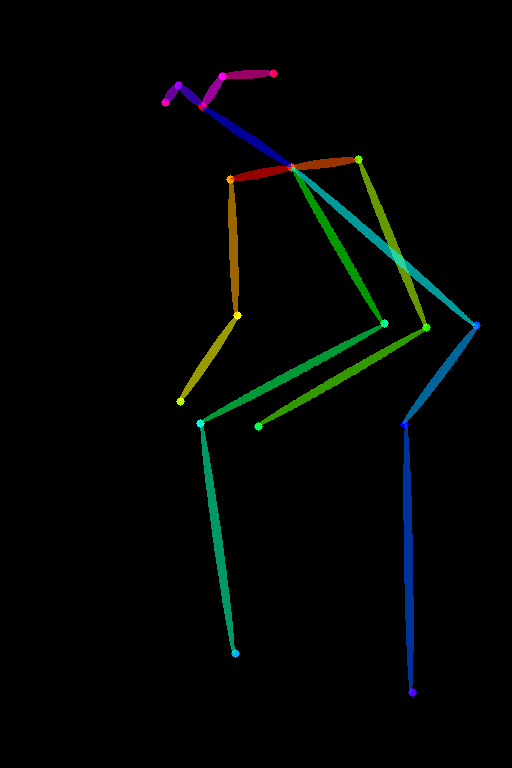

In [15]:
backbone_image

In [16]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch


# Q. 코드를 작성해 보세요.
# Edge Detection과 Openpose, 2개의 전처리기를 controlnets라는 리스트로 만듭니다. 
controlnets = [ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16),
               ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)]

In [17]:
torch.cuda.empty_cache()

In [18]:
# 리스트 controlnets를 파이프라인으로 전달합니다. 
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnets, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [19]:
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

In [20]:
torch.cuda.empty_cache()

In [25]:
# 프롬프트를 작성합니다. 
prompt =  'An elderly man, gracefully attired in a classic black suit, stands amidst a dimly lit, antique-filled study. He holds a weathered book in one hand, while the soft glow of an ornate table lamp casts gentle shadows on the mahogany furniture'
negative_prompt =  'Dark, abstract, futuristic, minimalistic'

# seed를 지정합니다. 
generator = torch.manual_seed(0)


m_images = [canny_image.resize((512, 512)), backbone_image.resize((512, 512))]

In [26]:
# 이미지를 생성합니다. 
gen_image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    image = m_images,
    num_inference_steps = 35,
    generator = generator).images



  0%|          | 0/35 [00:00<?, ?it/s]

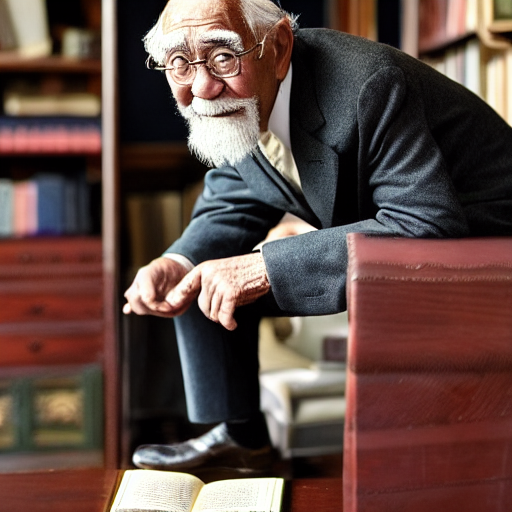

In [27]:
gen_image[0]

In [24]:
# 뭔가.... 뭔가가 보인다! ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 뭔가했네